## Exemplo de uso Análise de Compontes Principais (PCA) 
### -- Base: Breast Cancer data set. 


Objetivo: Visualizar os atributos que realmente importam para separar as duas classes (B ou M)

In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns

df = pd.read_csv("cancer.csv")

### Remoção de atributos que não são relevantes

In [36]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [37]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Correlação entre os atributos

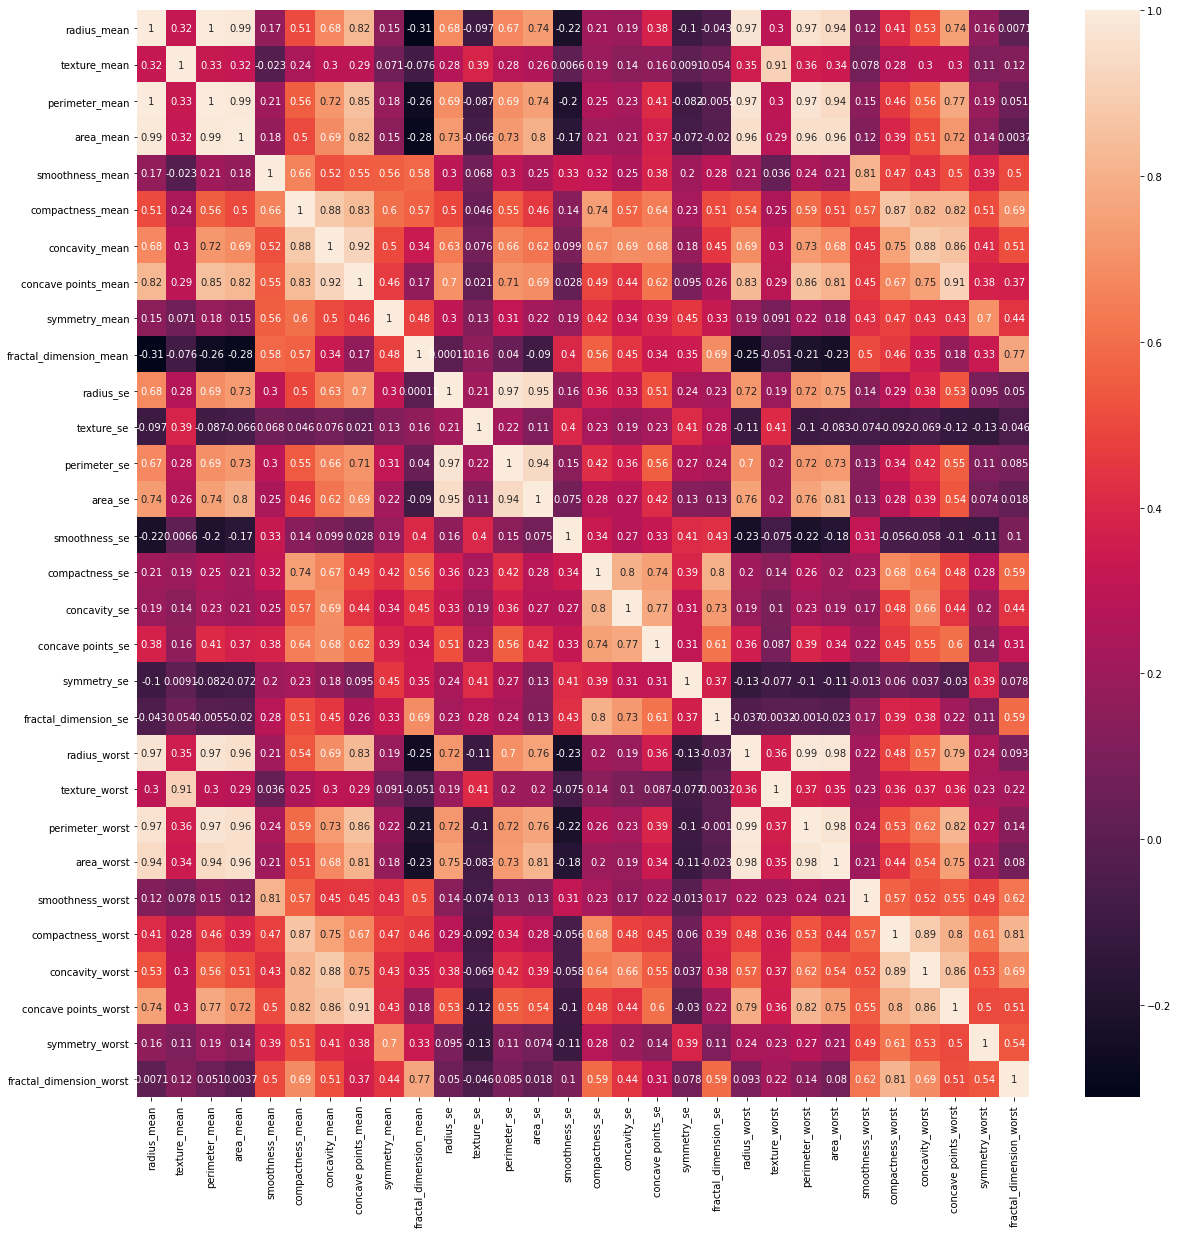

In [38]:
plt.figure(figsize=(20,20))
cor=df.corr()
sns.heatmap(cor,annot=True)

## Exemplo com PCA

### O modelo PCA é similar ao modelo preditivo não supervisionado e o atributo classe não é necessário

In [39]:
df_features = df.drop(['diagnosis'], axis=1)

### Normalização dos dados

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
standardized = StandardScaler()

In [42]:
standardized.fit(df_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaled_data = standardized.transform(df_features)

In [44]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Definição de quantidade de componentes (nesse caso, 3)

In [45]:
#PCA
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=3)

In [47]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
scaled_data.shape

(569, 30)

In [49]:
x_pca = pca.transform(scaled_data)

In [50]:
scaled_data.shape

(569, 30)

**Each column is a principal component**

In [51]:
x_pca.shape

(569, 3)

### Define uma estrutura series com a binarização dos valores da classe

In [ ]:
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= df['diagnosis'].apply(diag)b

In [ ]:
df_diag

### Gráfico 3D para visualização dos 3 eixos

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
x_pca[:1]

array([[ 9.19283683,  1.94858306, -1.12316639]])

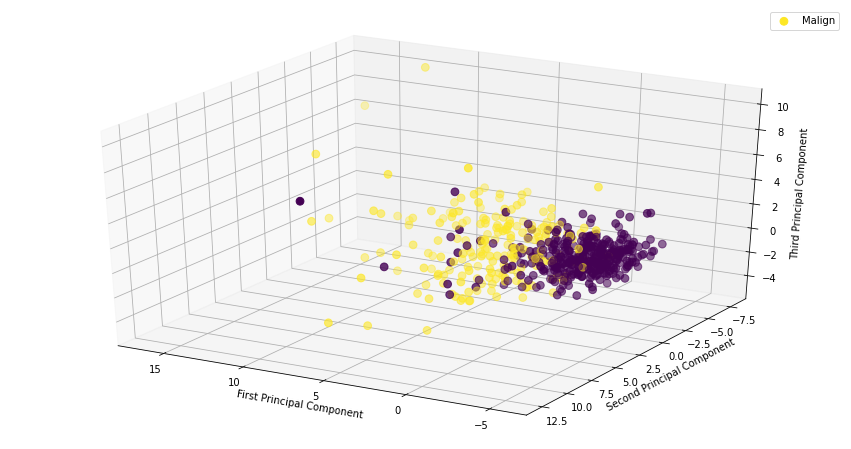

In [54]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

Text(0, 0.5, 'Third Principal Component')

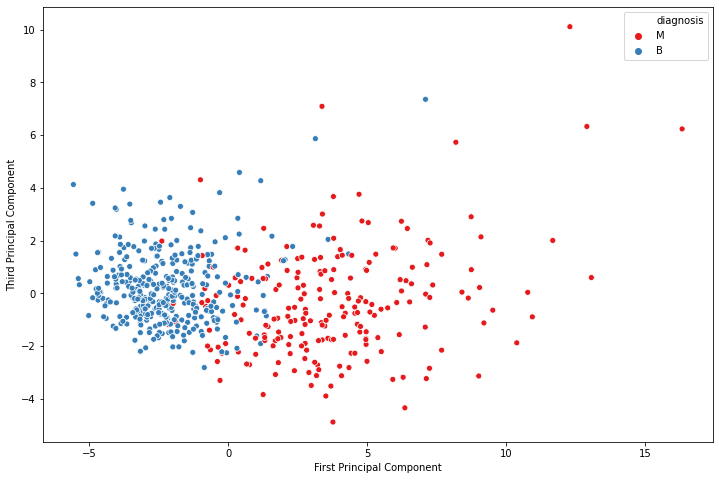

In [55]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,2],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Third Principal Component')

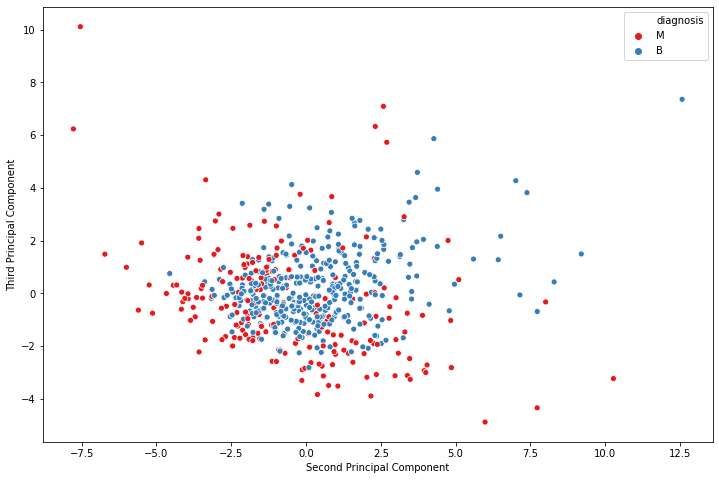

In [56]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,1], x_pca[:,2],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Second Principal Component')

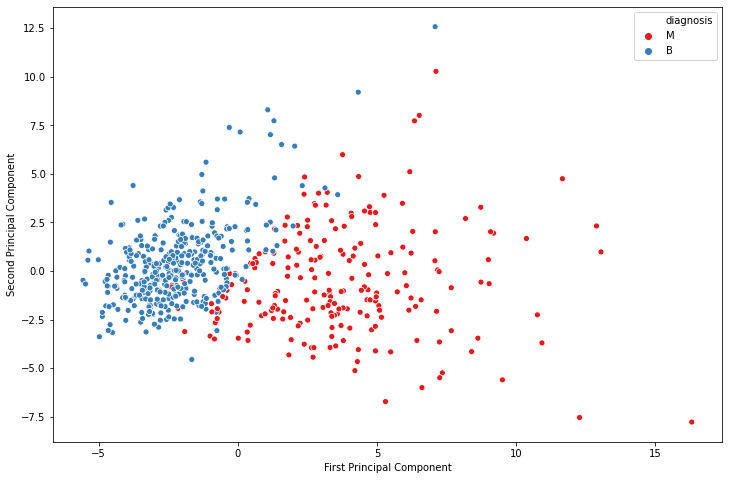

In [57]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')